In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import seaborn as sns
#sns.set_palettse('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
#import plotly.express as px
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Присвоим переменной «url» ссылку на датасет:


df = read_csv('E:/git/Data-Analysis101/datasets/marketing/marketing_campaign.csv', sep="\t")


#dataset = pd.read_csv(url, names = cols)

In [5]:
cols = ['Education', 'Marital_Status', 'Income', 'Kids', 'Days_of_client',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response']

In [6]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
# Remove unnecessary columns 
df.drop(["ID","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [8]:
# Drop the null values
df=df.dropna()

In [9]:

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_of_client'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_of_client
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,161


In [10]:
df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [12]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [13]:
df = df[['Education', 'Marital_Status', 'Income', 'Kids', 
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp', 'Complain', 'Response']]

In [27]:
cols_for_clusters = ['Education', 'Marital_Status', 'Income', 'Kids', 
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp']

In [15]:
cat_df = list(df.select_dtypes(include=["object"]).columns)

print(cat_df)

['Education', 'Marital_Status']


# Закодируем категориальные

In [16]:
LE = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [17]:
ds = df.copy()
cols_del = ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


In [18]:
X = scaled_ds

In [19]:
X.head()

,Education,Marital_Status,Income,Kids,Days_of_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp
0,-0.158041,-1.348829,0.234063,-1.264803,1.529129,0.310532,1.675488,1.319446,-0.439265
1,-0.158041,-1.348829,-0.234559,1.405806,-1.188411,-0.380509,-0.962358,-1.157987,-0.439265
2,-0.158041,0.741384,0.769478,-1.264803,-0.205155,-0.795134,0.280250,0.797881,-0.439265
3,-0.158041,0.741384,-1.017239,0.070501,-1.059945,-0.795134,-0.919224,-0.897205,-0.439265
4,-0.158041,0.741384,0.240221,0.070501,-0.951244,1.554407,-0.307044,0.537099,-0.439265


In [45]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
#y = kmeans.fit_predict(X[['Education', 'Income','Kids','Expenses']])
# y = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])
# y1 = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])

y = kmeans.fit_predict(X[[
'Education', 'Marital_Status', 'Income', 'Kids', 
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp']])

y1 = kmeans.fit_predict(
X[[
'Education', 'Marital_Status', 'Income', 'Kids', 
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp']])

In [87]:
#X['Cluster'] = kmeans.fit_predict(X[['Education', 'Income','Kids','Expenses']])
#X['Cluster'] = kmeans.fit_predict(X[['TotalNumPurchases', 'Income','Kids','Expenses']])

X['Cluster'] = kmeans.fit_predict(X[['Education', 'Marital_Status', 'Income', 'Kids', 
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp']])

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [46]:
vals = list(set(y))
print(vals)

[0, 1, 2, 3]


In [96]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)

pca.fit(scaled_ds)
X_new = pca.transform(scaled_ds)

In [97]:
X_new

array([[ 2.12884283,  1.59246933, -0.65689524],
       [-1.8886521 , -1.01501987,  0.62398818],
       [ 1.16404471, -0.26924742,  0.38891464],
       ...,
       [ 1.63115972,  0.00548772,  0.78954991],
       [ 0.79042242, -1.10457362,  0.45842608],
       [-1.10202164,  0.17898126, -1.35361034]])

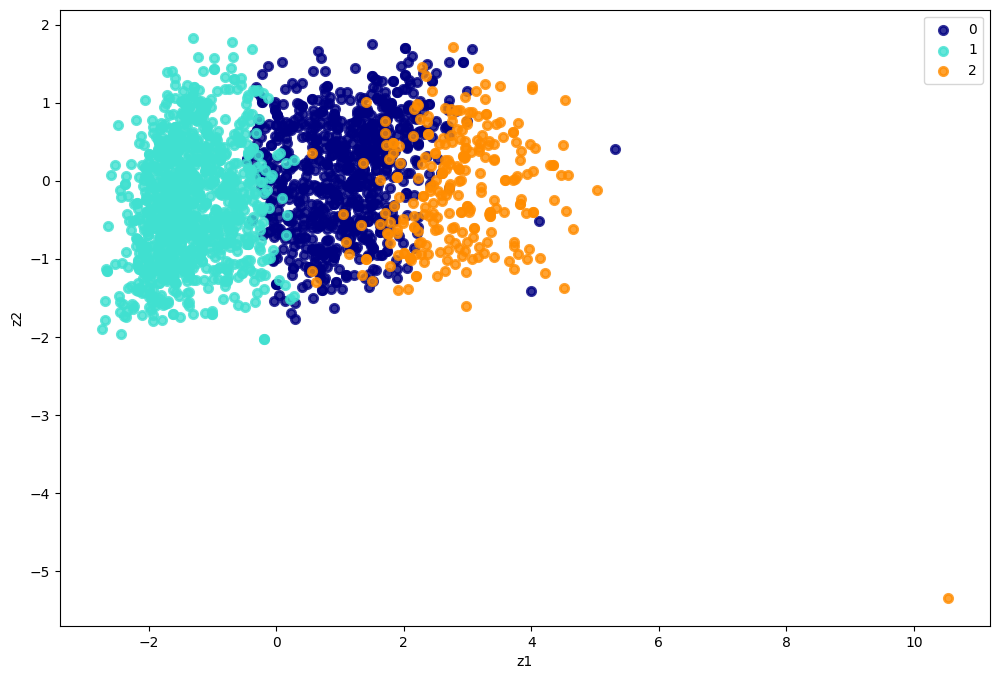

In [98]:
#pca = PCA(n_components=3)

#X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2,3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [99]:
pca.explained_variance_ratio_

array([0.31676831, 0.12387029, 0.11806029])

In [50]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

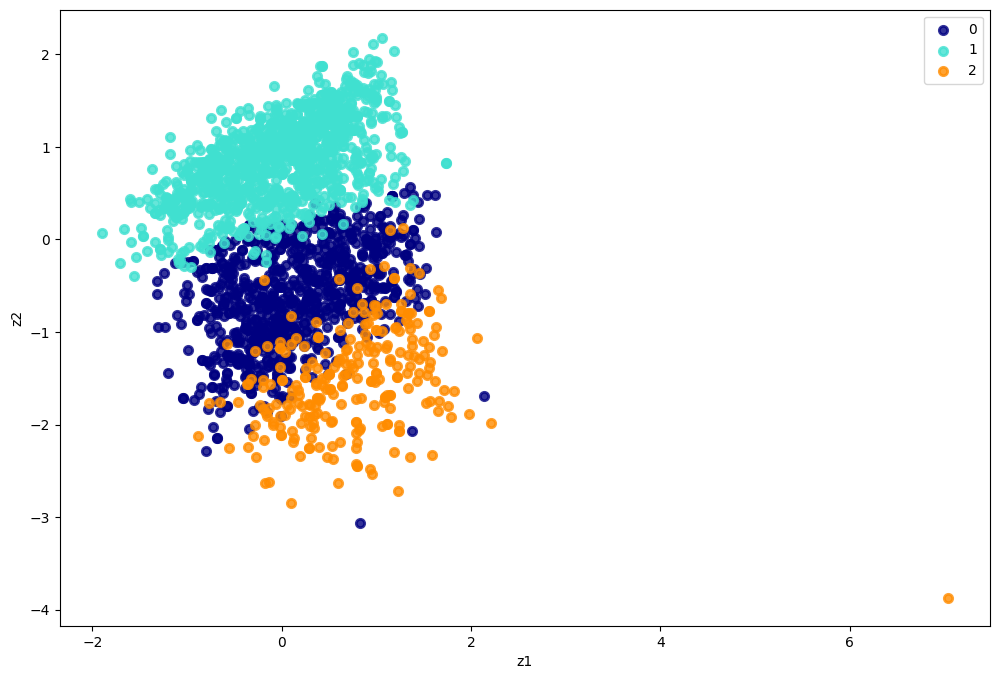

In [51]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [53]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

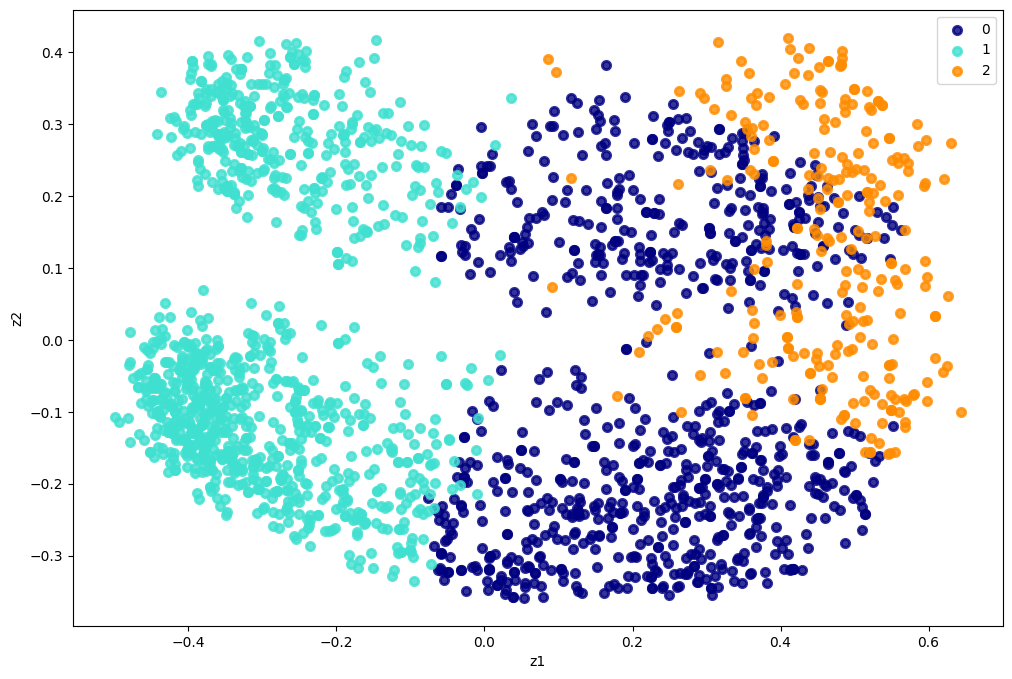

In [54]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# tSNE

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [56]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2216, 9)
New Shape of X:  (2216, 2)
Kullback-Leibler divergence after optimization:  0.7711016535758972
No. of iterations:  999


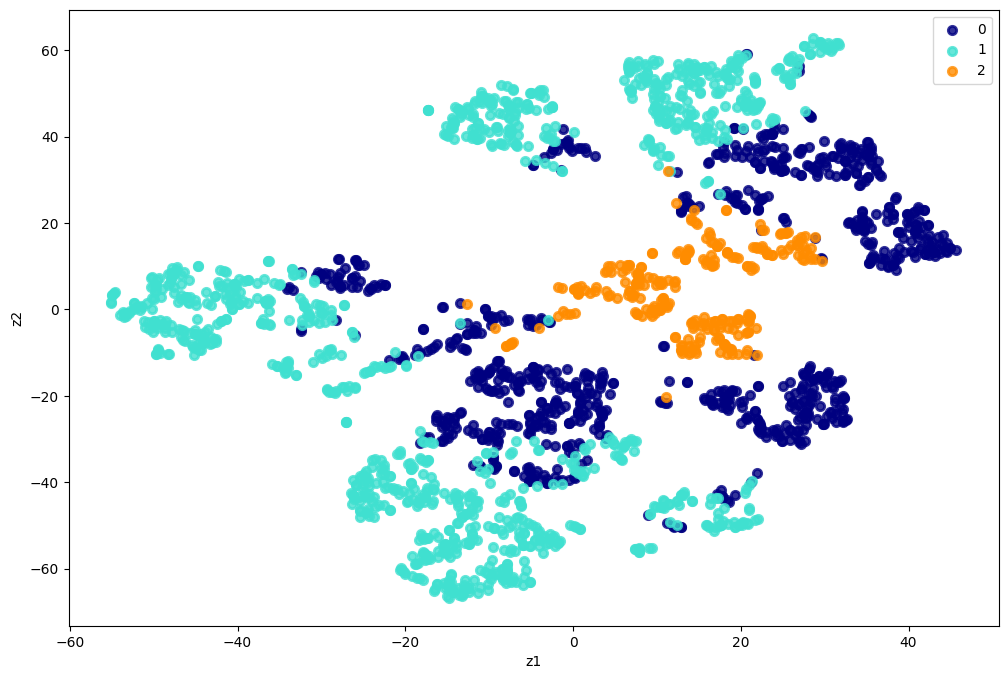

In [57]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [59]:
dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [60]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 37
Estimated no. of noise points: 2089
v_measure = 0.06282396100827539


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


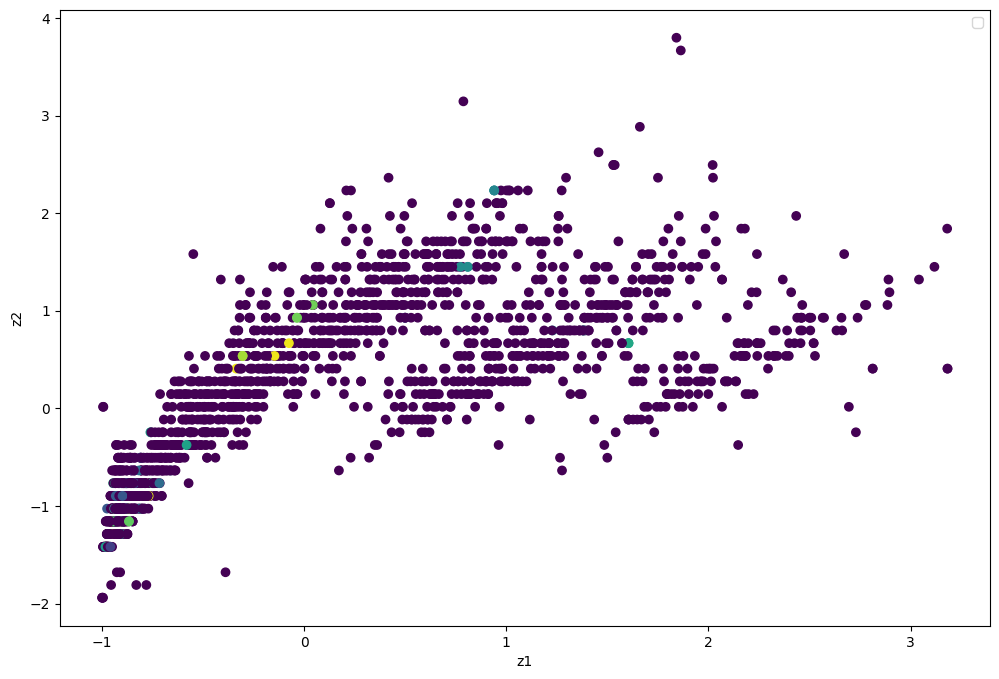

In [61]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X[cols[6]], X[cols[7]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [23]:
min_samples = 3

In [62]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [63]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

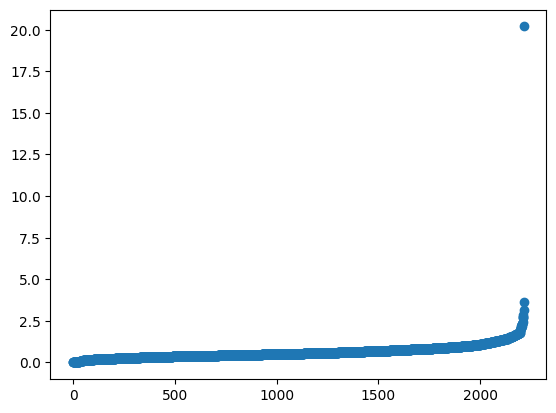

In [64]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [65]:
dbscan = DBSCAN(eps = 0.5, min_samples = min_samples)
print(dbscan)

DBSCAN(min_samples=3)


In [66]:
pred = dbscan.fit_predict(X)

In [67]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 116
Estimated no. of noise points: 1425
v_measure = 0.19903766164605155


In [68]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

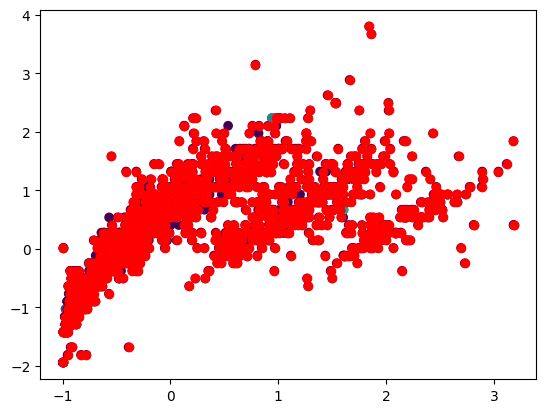

In [69]:
plt.scatter( X[cols[6]], X[cols[7]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[6]], values[cols[7]], color='r')
plt.show()